In [ ]:
# TAREA 4 - SELECCION DE CARACTERISTICAS

In [3]:
'''
Librerias a utilizar, algunas vistas en clase
y otras investigadas para desarrollar esta tarea
como los from de SelectKBest
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/movies.csv')
df

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,9/23/1994,26.9579,8.712,28675
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",3/14/1972,26.5804,8.686,21701
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,12/20/1974,15.6559,8.571,13099
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,12/15/1993,12.5642,8.565,16616
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,4/10/1957,14.6028,8.549,9307
...,...,...,...,...,...,...,...,...
8555,8555,238603,Earth to Echo,After a construction project begins digging in...,6/14/2014,1.6137,5.900,593
8556,8556,11968,Into the Blue,When they take some friends on an extreme spor...,9/30/2005,3.3432,5.902,1539
8557,8557,439079,The Nun,A priest with a haunted past and a novice on t...,9/5/2018,15.1733,5.901,6862
8558,8558,513409,Earthquake Bird,"Tokyo, Japan, 1989. Lucy Fly, a foreigner who ...",11/1/2019,1.1859,5.900,448


In [5]:
'''
Método de filtro a los datos mediante el uso de SelectKBest
'''
# Se seleccionan solo asl variables numéricas
df_num = df.select_dtypes(include=[np.number]).dropna()

# Definimos una variable objetivo
y = df_num["vote_average"]
X = df_num.drop(columns=["vote_average"])

from sklearn.feature_selection import SelectKBest, f_regression

selector_f = SelectKBest(score_func=f_regression, k="all")
X_new = selector_f.fit_transform(X, y)

selected_features = X.columns[selector_f.get_support()]
print("Características seleccionadas:", list(selected_features))

# Mostrar puntajes
scores = selector_f.scores_
for feature, score in zip(X.columns, scores):
    print(f"{feature}: {score:.2f}")



Características seleccionadas: ['Unnamed: 0', 'id', 'popularity', 'vote_count']
Unnamed: 0: 342277.29
id: 1.53
popularity: 13.08
vote_count: 670.77


In [6]:
'''
Modelos de selección de tipo wrapper
En este caso voy a utilizar 2 ejemplos de modelos
siendo uno LassoCV y otro RandomForestRegressor
(mismas que se detallan más adelante)
'''
#LassoCV
lasso = LassoCV(cv=5).fit(X, y)
importance_lasso = np.abs(lasso.coef_)
selected_lasso = X.columns[importance_lasso > 0]
print("Características seleccionadas con Lasso:", list(selected_lasso))

#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importance_rf = rf.feature_importances_

# Ordenar por importancia
feat_importances = pd.Series(importance_rf, index=X.columns).sort_values(ascending=False)
print("Importancia de variables con RandomForest:\n", feat_importances.head(10))

Características seleccionadas con Lasso: ['Unnamed: 0', 'id', 'vote_count']
Importancia de variables con RandomForest:
 Unnamed: 0    0.999758
vote_count    0.000082
popularity    0.000081
id            0.000079
dtype: float64


In [7]:
'''
Métricas para seleccionar características

Investigando algunos ejemplos de métricas de
selección de características aplicados a películas y predicción de ingresos
encontré las siguientes:

f_regression y R^2 son métricas muy clásicas cuando se asume que hay linealidad

Mutual Information es recomendada cuando las relaciones pueden ser no lineales

Lasso (Least Absolute Shrinkage and Selection Operator) es un método de
regresión lineal con regularización L1 para encontrar automáticamente el mejor
valor lambda

Random Forest es muy usada en predicción de ingresos de películas

Fuentes:
Brown, G., Pocock, A., Zhao, M.-J., & Luján, M. (2012).
Conditional likelihood maximisation: A unifying framework
for information theoretic feature selection. JMLR.

Delen, D., Sharda, R., & Kumar, P. (2007).
Movie forecast guru: A Web-based DSS for Hollywood managers.
Decision Support Systems.
'''

'\nMétricas para seleccionar características\n\nInvestigando algunos ejemplos de métricas de \nselección de características aplicados a películas y predicción de ingresos\nencontré las siguientes:\n\nf_regression y R^2 son métricas muy clásicas cuando se asume que hay linealidad\n\nMutual Information es recomendada cuando las relaciones pueden ser no lineales\n\nRandom Forest es muy usada en predicción de ingresos de películas\n\nFuentes:\n'

popularity    0.503084
vote_count    0.496916
dtype: float64


<Axes: >

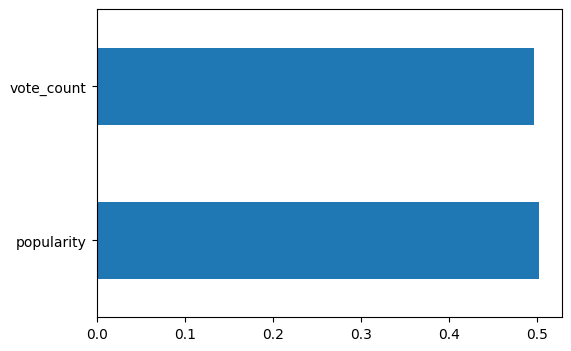

In [10]:
'''
Características más relevantes del conjunto de datos
'''
# Variables predictoras
X = df[["popularity", "vote_count"]]

# Variable objetivo (como se definio arriba)
y = df["vote_average"]

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Importancia de características
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

# Forma visual
importances.plot(kind="barh", figsize=(6,4))


In [ ]:
'''
Discusión de características seleccionadas

vote_count: tiene una relación directa con la confiabilidad de la calificación
promedio. Por así decirlo, una película con más votos tiende a reflejar mejor
la opinión global de la audiencia, reduciendo sesgos de lo que pudieran ser
calificaciones extremas.

popularity: refleja cuánta atención y exposición tiene la película en el público
(búsquedas, menciones, etc.), lo que puede estar correlacionado con la
probabilidad de que más personas la vean y la califiquen.
'''
